# Travel Insurance Claim
### Created By : Farras Warroihan

## Business Problem Understanding

**Context**  
Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan selama kita bepergian, baik di dalam negeri maupun luar negeri. Beberapa negara bahkan mewajibkan wisatawan untuk memiliki asuransi perjalanan, misalnya negara-negara di Eropa dan Amerika. Besarnya premi bergantung pada cakupan yang diinginkan, lama perjalanan, dan tujuan perjalanan. Perusahaan asuransi perjalanan ingin mengetahui pemegang polis yang akan mengajukan klaim asuransi. Data pemegang polis di perusahaan asuransi merupakan data historis yang terdiri dari destinasi, produk asuransi, dan sebagainya.
Target :

0 : Tidak Mengclaim Asuransi

1 : Mengclaim Asuransi

**Problem Statement :**

Sebagai perusahaan Asuransi Perjalanan, idealnya tujuannya adalah meraih keuntungan sebanyak mungkin. Dalam hal ini, perusahaan perlu mengetahui pemegang polis mana yang cenderung tidak mengajukan klaim asuransi, terutama agar perusahaan dapat mengelola risiko dengan lebih baik, menetapkan premi yang sesuai, meningkatkan layanan pelanggan, dan mengoptimalkan alokasi sumber daya.

**Goals :**

Tujuannya adalah untuk membuat model untuk memprediksi apakah pemegang polis akan mencoba mengklaim asuransi mereka, sebelum mereka menyatakannya.

Model tersebut harus mencapai akurasi tinggi sambil meminimalkan false positif (bahwa mereka akan mengklaim asuransi meskipun mereka tidak akan melakukannya) dan false negatif (mereka tidak akan mengajukan klaim tetapi mereka akan melakukannya)

Penting untuk meminimalkan false positif dan false negatif , karena terlalu banyak false positif akan mengakibatkan biaya yang tidak perlu, hilangnya pelanggan, dan penggunaan sumber daya yang tidak efisien. Perusahaan mungkin melebih-lebihkan risiko pemegang polis yang cenderung tidak mengajukan klaim, yang menyebabkan alokasi cadangan yang tidak perlu atau kenaikan premi. Pelanggan yang secara keliru diidentifikasi sebagai pihak yang lebih mungkin mengajukan klaim asuransi dapat menghadapi premi yang lebih tinggi atau penolakan penawaran, yang menyebabkan ketidakpuasan dan berpotensi mendorong mereka untuk beralih ke pesaing. Selain itu, tim investigasi klaim dapat membuang-buang sumber daya untuk klien berisiko rendah atau tidak mengajukan klaim. Sementara itu,false negatif yang berlebihan dapat menyebabkan kerugian finansial yang signifikan karena klien berisiko tinggi dikategorikan sebagai berisiko rendah, yang mengakibatkan harga polis yang lebih rendah, penyelesaian klaim yang lebih tinggi, dan kerugian yang tidak direncanakan. Paparan penipuan juga meningkat ketika model gagal mengidentifikasi pemegang polis berisiko tinggi, yang berpotensi menyebabkan klaim palsu luput dari perhatian. Lebih lanjut, beban kerja perencanaan keuangan dan pemrosesan klaim perusahaan dapat terpengaruh oleh kurangnya pemberitahuan awal mengenai volume klaim, sehingga menciptakan kejutan operasional.

**Key Stakeholders :**

Orang-orang yang mungkin tertarik untuk berinvestasi dalam model semacam itu meliputi orang dan kelompok berikut:

- Manajemen Perusahaan Asuransi: Berminat menggunakan model ini untuk memprediksi klaim dan mengoptimalkan harga premi, alokasi sumber daya, dan profitabilitas secara keseluruhan.

- Departemen Manajemen Risiko: Menggunakan model ini untuk memprediksi potensi klaim dan mengelola eksposur keuangan melalui alokasi cadangan yang lebih akurat.

- Tim Underwriting: Memanfaatkan model ini untuk menilai tingkat risiko pemegang polis dengan lebih baik dan menyesuaikan ketentuan asuransi.

- Departemen Klaim: Mendapatkan manfaat dari model ini dengan mengantisipasi klaim, menyederhanakan proses, dan meningkatkan deteksi penipuan.

- Pemegang Polis: Secara tidak langsung mendapatkan manfaat dari harga yang lebih baik dan penyelesaian klaim yang lebih cepat berkat wawasan model ini.

- Investor dan Pemegang Saham: Berminat pada peran model ini dalam meningkatkan profitabilitas, mengurangi kerugian tak terduga, dan memastikan stabilitas keuangan jangka panjang.


Key Coloumns and data type
-	Agency: Name of agency. (Text)
-	Agency Type: Type of travel insurance agencies. (Text)
-	Distribution Channel: Channel of travel insurance agencies. (Text)
-	Product Name: Name of the travel insurance products. (Text)
-	Gender: Gender of insured.(Text)
-	Duration: Duration of travel. (Integer)
-	Destination: Destination of travel. (Text)
-	Net Sales: Amount of sales of travel insurance policies. (Integer)
-	Commission (in value): Commission received for travel insurance agency. (Integer)
-	Age: Age of insured. (Integer)
-	Claim: Claim status. (Text)


In [ ]:
# General Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Statistical Functions
from scipy.stats import mannwhitneyu, chi2_contingency

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer, f1_score


# Imbalanced Dataset Handling
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour, RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.pipeline import Pipeline


# Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import pickle

# Set max columns for pandas display
pd.set_option('display.max_columns', None)

import shap

import matplotlib.pyplot as plt



In [4]:
#Load Dataset
df = pd.read_csv(r'C:\Users\FARRAS WARROIHAN\OneDrive\Desktop\Bootcamp\Capstone3\Travel Insurance\data_travel_insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [6]:
#Large Imbalance
print(df['Claim'].value_counts())
print()
print(df['Claim'].value_counts()/len(df['Claim'])*100)

Claim
No     43651
Yes      677
Name: count, dtype: int64

Claim
No     98.472749
Yes     1.527251
Name: count, dtype: float64


Sekarang kita periksa datanya untuk melihat apakah ada yang error

In [7]:
listItem = []
for col in df.columns:
    unique_vals = df[col].drop_duplicates().tolist() 
    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        round((df[col].isna().sum()/len(df[col])) * 100, 2),
        df[col].nunique(),
        list(df[col].drop_duplicates().sample(2).values),
        unique_vals 
    ])

dfDesc = pd.DataFrame(
    columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample', 'uniqueAll'],
    data=listItem
)

dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample,uniqueAll
0,Agency,object,0,0.00,16,"[RAB, ART]","[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, ..."
1,Agency Type,object,0,0.00,2,"[Travel Agency, Airlines]","[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,2,"[Offline, Online]","[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Ticket Protector, 1 way Comprehensive Plan]","[Annual Silver Plan, Cancellation Plan, Basic ..."
4,Gender,object,31647,71.39,2,"[M, nan]","[F, nan, M]"
5,Duration,int64,0,0.00,437,"[63, 108]","[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 37..."
6,Destination,object,0,0.00,138,"[UNITED KINGDOM, VENEZUELA]","[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KO..."
7,Net Sales,float64,0,0.00,1006,"[34.7, 58.5]","[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 8..."
8,Commision (in value),float64,0,0.00,915,"[6.5, 12.94]","[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88,..."
9,Age,int64,0,0.00,89,"[17, 42]","[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 5..."


We can see that there are a lot of missing values in Gender, Let's see in more depth the other columns

In [8]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [9]:
df['Agency'].unique()

array(['C2B', 'EPX', 'JZI', 'CWT', 'LWC', 'ART', 'CSR', 'SSI', 'RAB',
       'KML', 'TST', 'TTW', 'JWT', 'ADM', 'CCR', 'CBH'], dtype=object)

In [10]:
df['Destination'].unique()

array(['SINGAPORE', 'MALAYSIA', 'INDIA', 'UNITED STATES',
       'KOREA, REPUBLIC OF', 'THAILAND', 'GERMANY', 'JAPAN', 'INDONESIA',
       'VIET NAM', 'AUSTRALIA', 'FINLAND', 'UNITED KINGDOM', 'SRI LANKA',
       'SPAIN', 'HONG KONG', 'MACAO', 'CHINA', 'UNITED ARAB EMIRATES',
       'IRAN, ISLAMIC REPUBLIC OF', 'TAIWAN, PROVINCE OF CHINA', 'POLAND',
       'CANADA', 'OMAN', 'PHILIPPINES', 'GREECE', 'BELGIUM', 'TURKEY',
       'BRUNEI DARUSSALAM', 'DENMARK', 'SWITZERLAND', 'NETHERLANDS',
       'SWEDEN', 'MYANMAR', 'KENYA', 'CZECH REPUBLIC', 'FRANCE',
       'RUSSIAN FEDERATION', 'PAKISTAN', 'ARGENTINA',
       'TANZANIA, UNITED REPUBLIC OF', 'SERBIA', 'ITALY', 'CROATIA',
       'NEW ZEALAND', 'PERU', 'MONGOLIA', 'CAMBODIA', 'QATAR', 'NORWAY',
       'LUXEMBOURG', 'MALTA', "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
       'ISRAEL', 'SAUDI ARABIA', 'AUSTRIA', 'PORTUGAL', 'NEPAL',
       'UKRAINE', 'ESTONIA', 'ICELAND', 'BRAZIL', 'MEXICO',
       'CAYMAN ISLANDS', 'PANAMA', 'BANGLADESH', 'TURKME

In [11]:
df['Product Name'].unique()

array(['Annual Silver Plan', 'Cancellation Plan', 'Basic Plan',
       '2 way Comprehensive Plan', 'Bronze Plan',
       '1 way Comprehensive Plan', 'Rental Vehicle Excess Insurance',
       'Single Trip Travel Protect Gold', 'Silver Plan', 'Value Plan',
       '24 Protect', 'Annual Travel Protect Gold', 'Comprehensive Plan',
       'Ticket Protector', 'Travel Cruise Protect',
       'Single Trip Travel Protect Silver',
       'Individual Comprehensive Plan', 'Gold Plan', 'Annual Gold Plan',
       'Child Comprehensive Plan', 'Premier Plan',
       'Annual Travel Protect Silver',
       'Single Trip Travel Protect Platinum',
       'Annual Travel Protect Platinum',
       'Spouse or Parents Comprehensive Plan',
       'Travel Cruise Protect Family'], dtype=object)

In [12]:
sorted(df['Duration'].unique())

[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 

In [13]:
#We can see that there is a -1 duration, which should not be possible, let's see the data here
df[df['Duration'] == -1]


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
26228,JZI,Airlines,Online,Basic Plan,NaN,-1,MALAYSIA,18.0,6.3,118,No
26494,JZI,Airlines,Online,Basic Plan,NaN,-1,BRUNEI DARUSSALAM,18.0,6.3,118,No


In [14]:
# as this may seem suspicious, let's drop these rows
df = df.drop(df[df['Duration'] == -1].index)
df


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [15]:
sorted(df['Age'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 118]

## Duplicates

In [16]:
df.duplicated().sum()

4667

In [17]:
#there are duplicates so we drop them
df = df.drop_duplicates()

## Missing Values

In [18]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  27665
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

In [19]:
#The easiest way is to drop the row with the missing value, or easily fill in with Mode, as this is a lot of missing value row, it will greatly affect the data, so we can leave this alone for now and see if gender greatly affects Claim, for now let's create a seperate section for the unknown gender
df['Gender'] = df['Gender'].fillna('Unknown')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39659 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                39659 non-null  object 
 1   Agency Type           39659 non-null  object 
 2   Distribution Channel  39659 non-null  object 
 3   Product Name          39659 non-null  object 
 4   Gender                39659 non-null  object 
 5   Duration              39659 non-null  int64  
 6   Destination           39659 non-null  object 
 7   Net Sales             39659 non-null  float64
 8   Commision (in value)  39659 non-null  float64
 9   Age                   39659 non-null  int64  
 10  Claim                 39659 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.6+ MB


## EDA

We will now look at the data at a surface level, so we can see the relationships between the different datas

In [21]:
cat_features = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Gender', 'Destination']

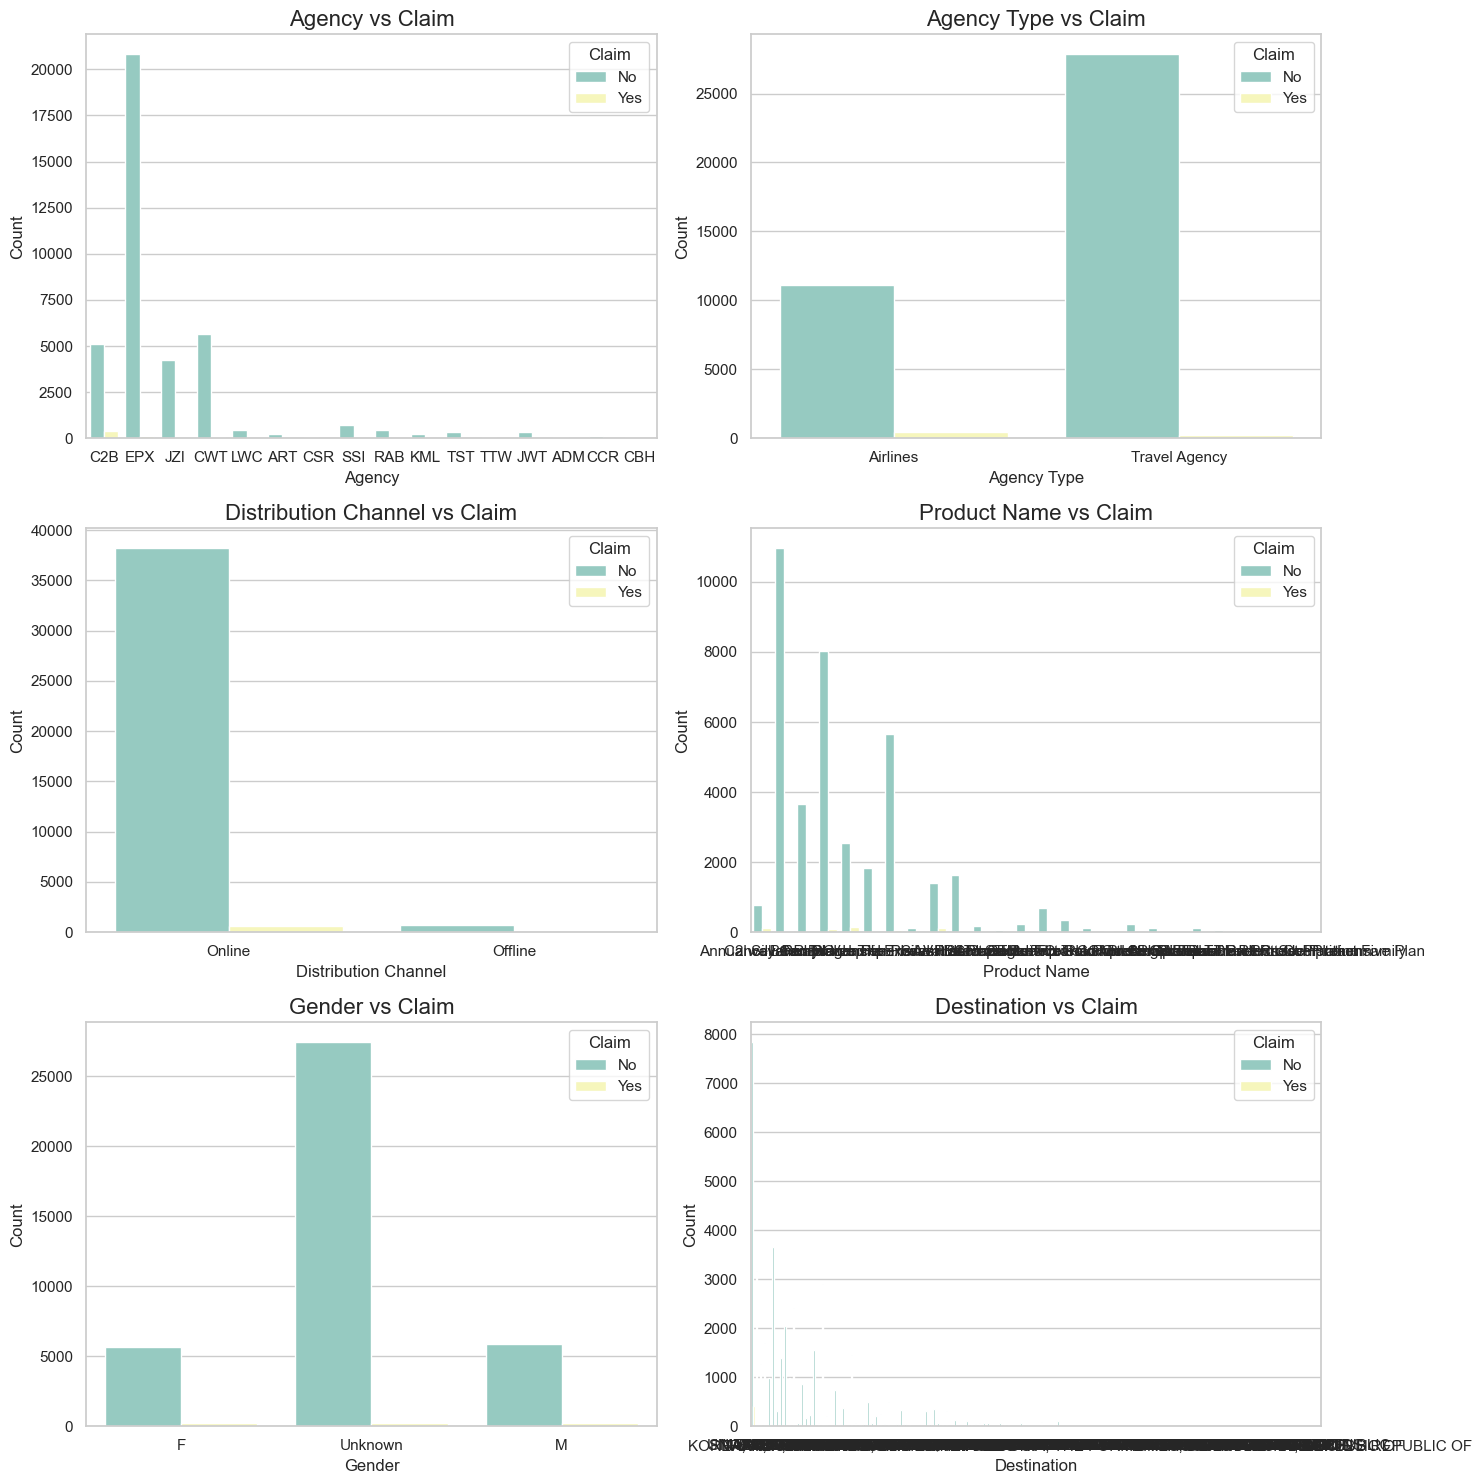

In [22]:
plt.figure(figsize=(15, 15), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
for feature in cat_features:
    ax = plt.subplot(3, 2, plotnumber) 
    
    sns.countplot(x=feature, hue='Claim', data=df, ax=ax)
    
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'{feature} vs Claim', fontsize=16)
    
    plotnumber += 1

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Claim Distribution'}, xlabel='Claim'>

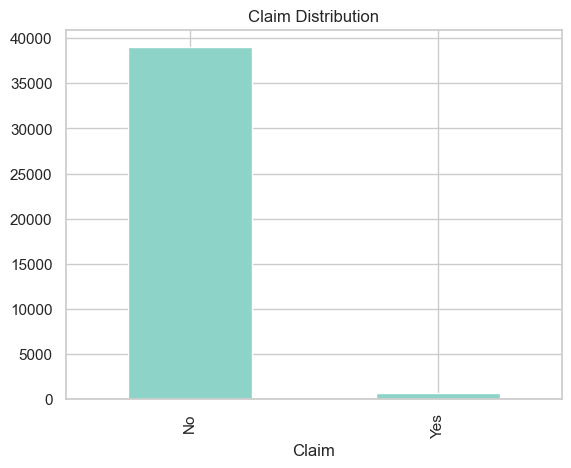

In [23]:
#first we see how balanced our target is 
df['Claim'].value_counts().plot(kind='bar', title='Claim Distribution')


We can see that the data is very imbalance so we might need to do something later on

In [24]:
num_feature = [feature for feature in df.describe().columns]
num_feature

['Duration', 'Net Sales', 'Commision (in value)', 'Age']

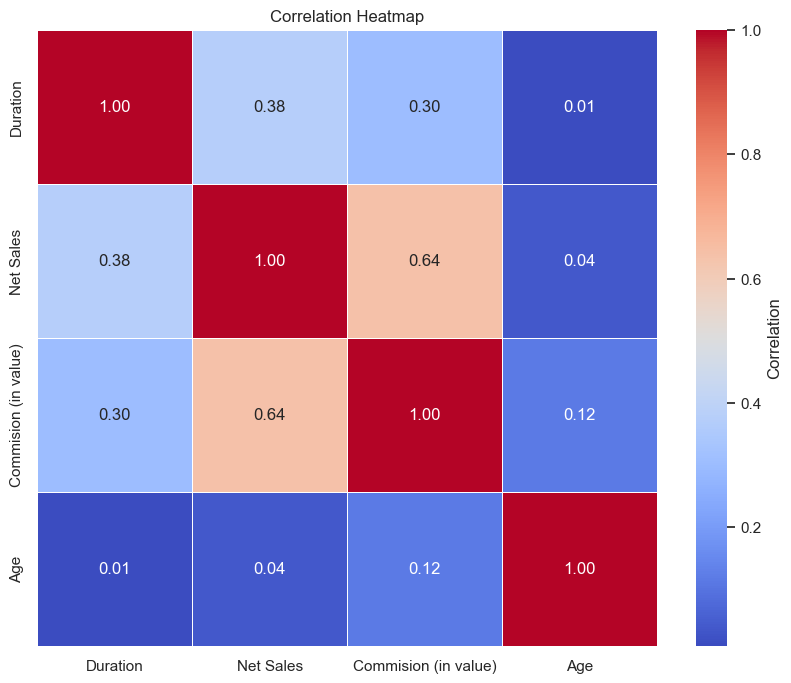

In [25]:
correlation_matrix = df[num_feature].corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, 
            annot=True,             
            cmap='coolwarm',        
            fmt='.2f',              
            linewidths=0.5,      
            cbar_kws={'label': 'Correlation'}) 
plt.title('Correlation Heatmap')  
plt.show() 

## Outliers

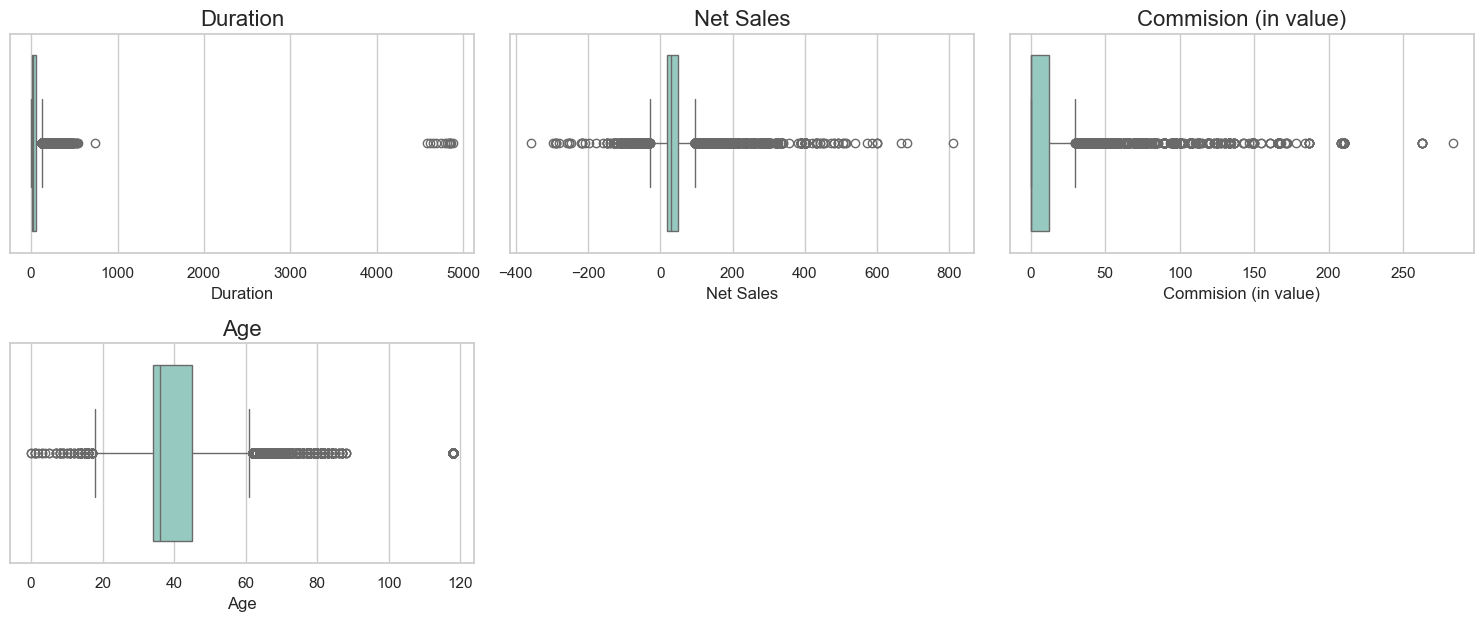

In [26]:
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber = plotnumber + 1

In [27]:
age_counts = df['Age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Count']
age_counts

,Age,Count
0,36,13562
1,31,1678
2,48,1619
3,35,1584
4,30,878
...,...,...
84,3,2
85,5,2
86,0,2
87,2,1


## Define X and Y

In [28]:
X = df.drop(columns='Claim')
y = df['Claim']
X


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57
1,EPX,Travel Agency,Online,Cancellation Plan,Unknown,4,MALAYSIA,10.0,0.00,33
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Unknown,20,UNITED STATES,112.0,0.00,59
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,Unknown,14,CHINA,30.0,0.00,36
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Unknown,17,AUSTRALIA,79.2,47.52,47
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,Unknown,51,CHINA,36.0,0.00,36


In [29]:
y

0         No
1         No
2         No
3         No
4         No
        ... 
44323    Yes
44324     No
44325     No
44326     No
44327     No
Name: Claim, Length: 39659, dtype: object

## Data Splitting

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,
                 y,
                 test_size=0.2,
                 random_state=0,
                 stratify=y)

## Preprocessing

In [31]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,39659.000000,39659.000000,39659.000000,39659.000000
mean,52.400514,42.344021,10.442831,39.926347
std,113.545054,50.026207,20.356413,13.515320
min,0.000000,-357.500000,0.000000,0.000000
25%,11.000000,19.000000,0.000000,34.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.000000,11.880000,45.000000
max,4881.000000,810.000000,283.500000,118.000000


In [32]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,Unknown,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Unknown,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


To prepare for the data we will do the following:
Missing Values:
We have seen that Gender has a large proportion of Missing Value, as it is a categorical feature, our options are to either drop the coloumn, drop the rows with the missing value, add in the Mode, or add a new constant. Due to the large amount of missing value the only option is to add a new constant with "Not Specified" and any other option may skew the model, or result in the number of data to greatly decrease.

- Agency: Binary Encoding
- Agency Type: One-Hot Encoding	
- Claim : One-Hot Encoding	
- Distribution Channel: One-Hot Encoding
- Product Name: Binary Encoding
- Gender: One-Hot Encoding
- Duration: Robust Scaling
- Destination: Binary Encoding	
- Net Sales
- Commision (in value)	
- Age : Robust Scaling



In [33]:
#Fill in the Missing Values, in this case it's Gender
df['Gender'] = df['Gender'].fillna('Not Specified')

In [34]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['Agency Type', 'Distribution Channel', 'Gender']),
    ('binary', ce.BinaryEncoder(), ['Agency', 'Product Name', 'Destination']),
    ('robust', RobustScaler(), ['Duration', 'Age', 'Net Sales', 'Commision (in value)'])
], remainder='passthrough')

In [60]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  
y_encoded = label_encoder.transform(y)


In [36]:
y_test_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
y_train_encoded

array([0, 0, 0, ..., 0, 0, 0])

## Modeling

Finding the best model, and Imbalance treatment

In [38]:
# Define Imbalance treatment
smote = SMOTE(random_state=0)
nearmiss = NearMiss()
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

In [39]:
#define base model
logreg = LogisticRegression(random_state=0, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0, class_weight='balanced')
rf = RandomForestClassifier(random_state=0, class_weight='balanced') 
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')


finding best model

In [ ]:
models = [logreg, knn, tree, rf, ada, gbc, xgbc]
score = []
nilai_mean = []
nilai_std = []


f1_scorer = make_scorer(f1_score)

for i in models:
    pipe_model = Pipeline([
        ('transformer', transformer),            
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train_encoded,
        cv=5,
        scoring=f1_scorer,
        error_score='raise'
    )

    score.append(model_cv)
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())

In [41]:
df_cv = pd.DataFrame({
    'model':['logreg', 'knn', 'tree', 'rf',' ada', 'gbc', 'xgbc'],
    'mean':nilai_mean,
    'std':nilai_std
})

df_cv

,model,mean,std
0,logreg,0.108221,0.006163
1,knn,0.006870,0.008417
2,tree,0.065478,0.030003
3,rf,0.012833,0.012198
4,ada,0.038810,0.024969
5,gbc,0.000000,0.000000
6,xgbc,0.003419,0.006838


Resampling with SMOTE

In [ ]:
models = [logreg, knn, tree, rf, ada, gbc, xgbc]
score = []
nilai_mean = []
nilai_std = []


f1_scorer = make_scorer(f1_score)

for i in models:
    pipe_model = Pipeline([
        ('transformer', transformer), 
        ('resampler', smote),           
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train_encoded,
        cv=5,
        scoring=f1_scorer,
        error_score='raise'
    )

    score.append(model_cv)
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())

In [43]:
df_cv

,model,mean,std
0,logreg,0.108221,0.006163
1,knn,0.006870,0.008417
2,tree,0.065478,0.030003
3,rf,0.012833,0.012198
4,ada,0.038810,0.024969
5,gbc,0.000000,0.000000
6,xgbc,0.003419,0.006838


We can see that the highest score is XGBoostClassifier as it has the highest mean

## Hyperparameter tuning

In [44]:
max_depth = list(np.arange(1,11))                       # kedalaman pohon
learning_rate = list(np.arange(0.01, 1.0, 0.01))        # learning rate
n_estimators = list(np.arange(100,201))                 # jumlah pohon
subsample = list(np.arange(0.2, 1.0, 0.1))              # jumlah baris tiap pohon (% dari total baris train set)
gamma = list(np.arange(1,11))                           # gamma (min_impurity_decrease)
colsample_bytree = list(np.arange(0.1, 1.0, 0.2))       # jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
reg_alpha = list(np.logspace(-3,3,7))                   # alpha (regularization)

# Hyperparam space XGboost
hyperparam_space_xgbc = {
    'balancing':[smote, rus, ros, nearmiss, None],
    'model__max_depth':max_depth,
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__gamma':gamma,
    'model__colsample_bytree':colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [45]:
# Benchmark model 2
xgbc = XGBClassifier(random_state=0, verbosity=0)

# Create the algorithm chains
estimator_xgbc = Pipeline([
        ('transformer', transformer),
        ('balancing', smote),
        ('model', xgbc)
        ])

# Hyperparameter tuning
random_xgbc = RandomizedSearchCV(
    estimator_xgbc,
    param_distributions = hyperparam_space_xgbc,
    cv = 5,
    scoring = f1_scorer,
    n_jobs = -1,
    random_state=0,
    n_iter=100
)

In [46]:
random_xgbc.fit(X_train, y_train_encoded)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel',
                                                                                'Gender']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination']),
                                                                              ('robust',
                                                                               RobustScaler(),
                                                                               ['Duration',
                                                                                'Age',
                                                                                'Net '
                                                                                'Sales',
                                                                                'Commision '
                                                                                '(in '
                                                                                'value)'])])...
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...],
                                        'model__reg_alpha': [0.001, 0.01, 0.1,
                                                             1.0, 10.0, 100.0,
                                                             1000.0],
                                        'model__subsample': [0.2,
                                                             0.30000000000000004,
                                                             0.4000000000000001,
                                                             0.5000000000000001,
                                                             0.6000000000000001,
                                                             0.7000000000000002,
                                                             0.8000000000000003,
                                                             0.9000000000000001]},
                   random_state=0,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [47]:
pd.DataFrame(random_xgbc.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,param_model__colsample_bytree,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
91,2.902492,0.673262,0.088968,0.010670,0.4,0.100,141,9,0.38,8,0.1,SMOTE(random_state=0),"{'model__subsample': 0.4000000000000001, 'mode...",0.132283,0.156986,0.123741,0.141914,0.123539,0.135693,0.012604,1
12,2.951856,0.559929,0.093395,0.026675,0.9,0.100,179,2,0.17,3,0.5,SMOTE(random_state=0),"{'model__subsample': 0.9000000000000001, 'mode...",0.122574,0.165680,0.115183,0.130734,0.127865,0.132407,0.017458,2
4,2.816922,0.566105,0.106486,0.060382,0.5,0.010,171,3,0.43,5,0.7,SMOTE(random_state=0),"{'model__subsample': 0.5000000000000001, 'mode...",0.120898,0.157598,0.120743,0.145133,0.097959,0.128466,0.020852,3
96,4.592960,0.214105,0.092227,0.014694,0.2,10.000,183,8,0.06,1,0.7,SMOTE(random_state=0),"{'model__subsample': 0.2, 'model__reg_alpha': ...",0.124048,0.145856,0.121339,0.127193,0.120048,0.127697,0.009405,4
52,2.151845,0.216409,0.069649,0.004063,0.3,0.001,110,4,0.20,7,0.9,SMOTE(random_state=0),"{'model__subsample': 0.30000000000000004, 'mod...",0.123147,0.140266,0.119718,0.134831,0.117479,0.127088,0.008897,5


In [48]:
print('XGBoost')
print('Best_score:', random_xgbc.best_score_)
print('Best_params:', random_xgbc.best_params_)

XGBoost
Best_score: 0.1356927533010647
Best_params: {'model__subsample': 0.4000000000000001, 'model__reg_alpha': 0.1, 'model__n_estimators': 141, 'model__max_depth': 9, 'model__learning_rate': 0.38, 'model__gamma': 8, 'model__colsample_bytree': 0.1, 'balancing': SMOTE(random_state=0)}


In [49]:
# Before hyperparameter tuning
smote = SMOTE(random_state=0)

model = XGBClassifier(random_state=0, verbosity=0)

model_pipe = Pipeline([
    ('transformer', transformer),  
    ('balancing', smote),          
    ('model', model)               
])

model_pipe.fit(X_train, y_train_encoded)
y_pred = model_pipe.predict(X_test)
y_test_encoded = label_encoder.transform(y_test)

f1score_xgbc_benchmark = fbeta_score(y_test_encoded, y_pred, beta=2)
print(f"F-beta Score (Beta=2): {f1score_xgbc_benchmark}")



F-beta Score (Beta=2): 0.18722466960352424


In [50]:
#After Hypertuning
xgbc_tuning = random_xgbc.best_estimator_

xgbc_tuning.fit(X_train, y_train_encoded)

y_pred_xgbc_tuning = xgbc_tuning.predict(X_test)

y_test_encoded = label_encoder.transform(y_test)

f1score_xgbc_tuning = f1_score(y_test_encoded, y_pred_xgbc_tuning)
print(f"F1 Score after hyperparameter tuning: {f1score_xgbc_tuning}")


F1 Score after hyperparameter tuning: 0.15756035578144853


In [51]:
#Classification report
report_default = classification_report(y_test_encoded, y_pred)
report_tuned = classification_report(y_test_encoded, y_pred_xgbc_tuning)

print('Classification Report Default XGBC: \n', report_default)
print('Classification Report Tuned XGBC: \n', report_tuned)

Classification Report Default XGBC: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      7797
           1       0.09      0.25      0.14       135

    accuracy                           0.95      7932
   macro avg       0.54      0.60      0.55      7932
weighted avg       0.97      0.95      0.96      7932

Classification Report Tuned XGBC: 
               precision    recall  f1-score   support

           0       0.99      0.92      0.96      7797
           1       0.10      0.46      0.16       135

    accuracy                           0.92      7932
   macro avg       0.54      0.69      0.56      7932
weighted avg       0.97      0.92      0.94      7932



As we want to prioritise accuracy we will choose the default

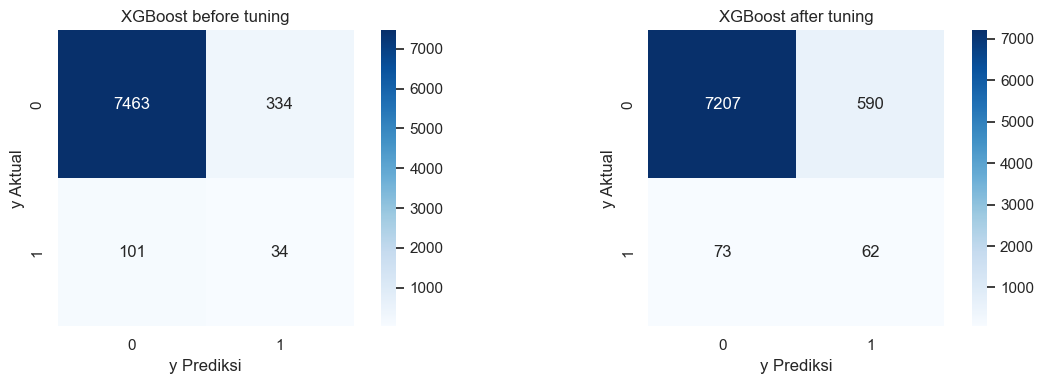

In [ ]:


# Encode y_test to match the format of y_pred (0 and 1)
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Create a figure with size (12, 4)
plt.figure(figsize=(12,4))

# Model XGBoost before tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test_encoded, y_pred), annot=True, fmt='.0f', square=True, cmap='Blues')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('XGBoost before tuning')

# Model XGBoost after tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test_encoded, y_pred_xgbc_tuning), annot=True, fmt='.0f', square=True, cmap='Blues')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('XGBoost after tuning')

# Show the plot
plt.tight_layout()
plt.show()


The number of true positives has increased after tuning, whereas the number of true negatives has significantly decreased (which may indicate more false positives).  False positives appear to have increased as a result of the model's apparent shift toward more conservative class 0 (negative) predictions.

## Feature Importance

Transformers in the pipeline: [('onehot', OneHotEncoder(), ['Agency Type', 'Distribution Channel', 'Gender']), ('binary', BinaryEncoder(cols=['Agency', 'Product Name', 'Destination'],
              mapping=[{'col': 'Agency',
                        'mapping':      Agency_0  Agency_1  Agency_2  Agency_3  Agency_4
 1          0         0         0         0         1
 2          0         0         0         1         0
 3          0         0         0         1         1
 4          0         0         1         0         0
 5          0         0         1         0         1
 6          0         0         1         1         0
 7          0         0         1         1         1
 8          0         1         0         0         0
 9          0         1         0         0         1
 10         0         1         0         1         0
 11         0         1         0         1         1
 12         0         1         1         0         0
 13         0         1         1     

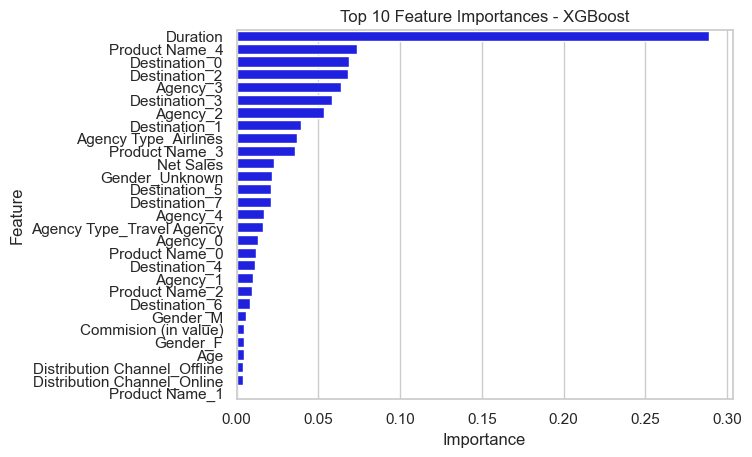

In [53]:
# Check the transformers in the pipeline
print("Transformers in the pipeline:", xgbc_tuning['transformer'].transformers_)

# Get feature names for OneHotEncoder (categorical columns)
feat_onehot = list(xgbc_tuning['transformer'].transformers_[0][1].get_feature_names_out())  

# Get feature names for BinaryEncoder (binary encoded columns)
feat_binary = list(xgbc_tuning['transformer'].transformers_[1][1].get_feature_names_out()) 

# Get feature names for RobustScaler (scaled numerical columns)
feat_scale = xgbc_tuning['transformer'].transformers_[2][2] 

if len(xgbc_tuning['transformer'].transformers_) > 3:
    feat_remainder = list(xgbc_tuning['transformer'].transformers_[3][2])  
else:
    feat_remainder = [] 

feat = feat_scale + feat_onehot + feat_binary + feat_remainder

print("Number of Features:", len(feat))
print("Number of Feature Importances:", len(xgbc_tuning['model'].feature_importances_))

print("Feature Importances from Model:", xgbc_tuning['model'].feature_importances_)

if len(feat) != len(xgbc_tuning['model'].feature_importances_):
    print("There is a mismatch in the number of features and importance values.")
    
    print("Top Feature Importances (first 10):", xgbc_tuning['model'].feature_importances_[:10])

if len(feat) == len(xgbc_tuning['model'].feature_importances_):
    imp = pd.DataFrame({
        'feature': feat,
        'importance': xgbc_tuning['model'].feature_importances_
    }).sort_values('importance', ascending=False)

    print(imp)

    sns.barplot(data=imp, y='feature', x='importance', color='b')
    plt.title('Top 10 Feature Importances - XGBoost')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("The number of features does not match the number of importance values.")


With an importance score near 0.30, `Duration` is by far the most important feature in the model, outweighing all others, according to the XGBoost feature importance plot. Although they contribute much less (around 0.04–0.06), features like `Product Name_4`, `Destination_0`, `Destination_2`, and `Agency_3` come after. Features like `Agency Type_Airlines`, `Product Name_3`, and `Net Sales` are of moderate relevance. In order to simplify the model without significantly compromising performance, a number of features exhibit relatively low relevance and might be removed. These consist of `Product Name_1`, `Commmission (in value)`, `Age`, `Distribution Channel_Offline`, `Distribution Channel_Online`, `Gender_F`, `Gender_M`, `Gender_Unknown`, and `Commission (in value)`. To make sure these aspects aren't required for business interpretation or indirectly contributing through interactions, ablation testing is advised prior to ultimate elimination.

Save Final Model using Pikle

In [54]:
xgbc_tuning = XGBClassifier()
X_transformed = transformer.fit_transform(X)

xgbc_tuning.fit(X_transformed, y_encoded)

with open('model_xgboost_v1.sav', 'wb') as model_file:
    pickle.dump(xgbc_tuning, model_file)

In [55]:
# load model

model_loaded = pickle.load(open('model_xgboost_v1.sav', 'rb'))
model_loaded

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Explaining using SHAP

Model has been saved to 'model_xgboost_v1.sav'


100%|===================| 31639/31727 [01:15<00:00]        

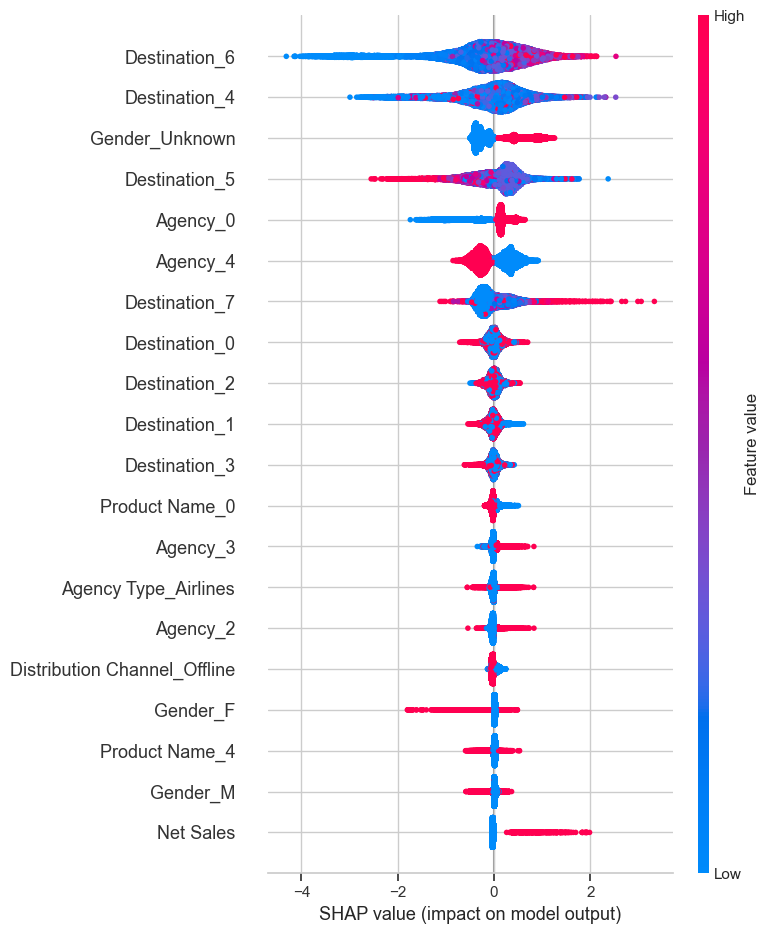

SHAP values have been saved to 'shap_values.pkl'


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test) 

xgb_model = XGBClassifier()
xgb_model.fit(X_train_transformed, y_train_encoded)


explainer_shap = shap.TreeExplainer(xgb_model, X_train_transformed)
shap_values = explainer_shap.shap_values(X_train_transformed)

feat_scale = transformer.transformers_[2][2]  # Scaled features (numerical)
feat_onehot = list(transformer.transformers_[0][1].get_feature_names_out())  # One-hot encoded features
feat_binary = list(transformer.transformers_[1][1].get_feature_names_out())  # Binary encoded features


feat_remainder = list(X.columns[transformer.transformers_[3][2]]) if len(transformer.transformers_) > 3 else []

feat = feat_scale + feat_onehot + feat_binary + feat_remainder

shap.summary_plot(shap_values, X_train_transformed, feature_names=feat)

with open('shap_values.pkl', 'wb') as shap_file:
    pickle.dump(shap_values, shap_file)

print("SHAP values have been saved to 'shap_values.pkl'")


Important Features:

- The wide range of SHAP values displayed by "Destination_6" suggests that it has a significant impact on the model's predictions.
- Like "Destination_6," "Destination_4" has a broad range of SHAP values, indicating that it is a key factor in the model's decision-making.
- "Gender_Unknown": Indicates that the model is sensitive to whether or not gender is identified, as evidenced by the notable fluctuation in SHAP values.

Business Insight:
-  Since they have the biggest influence on model predictions, concentrate on improving and comprehending "Destination_6" and "Destination_4" for increased predicted accuracy.
-  Since "Gender_Unknown" significantly affects the model's decision-making, it should also be taken into account in commercial plans.
- Although they might not require as much optimization, features like "Gender_F" and "Net Sales" offer more reliable, constant contributions and are nevertheless useful for preserving steady model performance.